In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random_state=42

In [4]:
df=pd.read_csv("adult_clean.csv")

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  47985 non-null  object 
 14  salary          48842 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 5.6+ MB


## seprating numerical & categorical columns

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


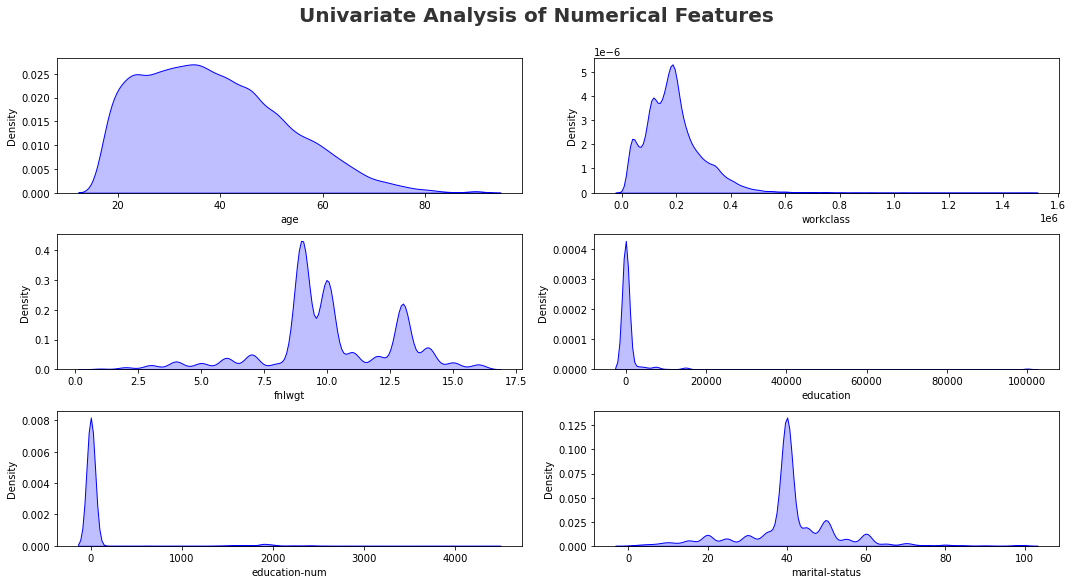

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6,2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

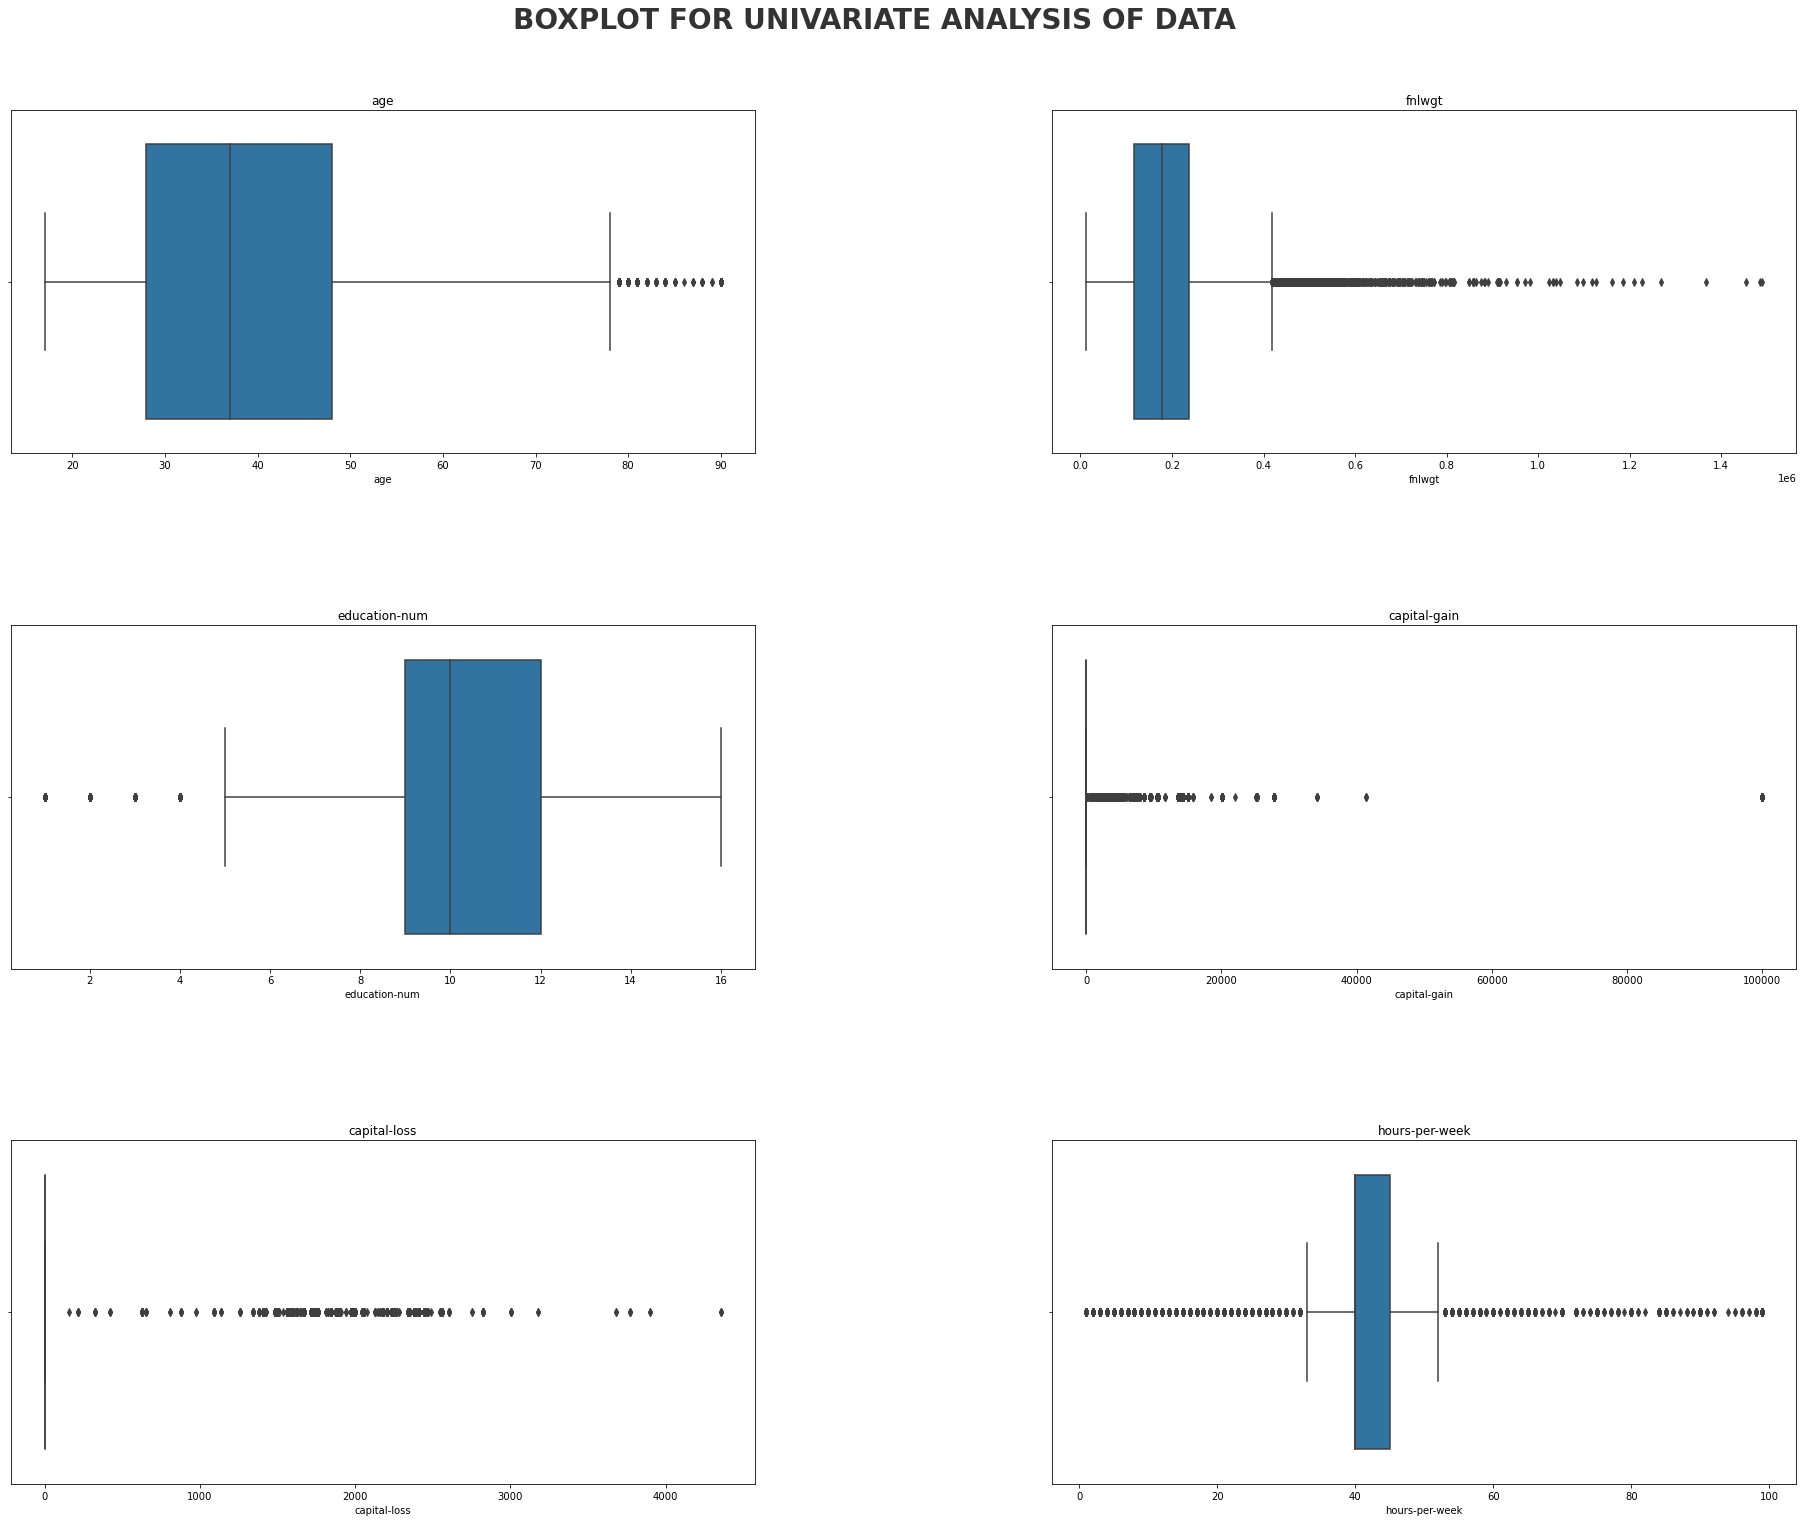

In [18]:
features =numeric_features
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(3,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

## Handling outliers

In [118]:
df1=df.copy() # creating a copy of the data

In [119]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [120]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()


In [121]:
# using iqr method for the features which are right skewed  --> Global_active_power, Global_reactive_power, Global_intensity,Sub_metering_1, Sub_metering_2

In [122]:
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

**for age**

In [123]:
remove_outliers_IQR('age')

percentile25 28.0
percentile75 48.0
Upper limit 78.0
Lower limit -2.0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


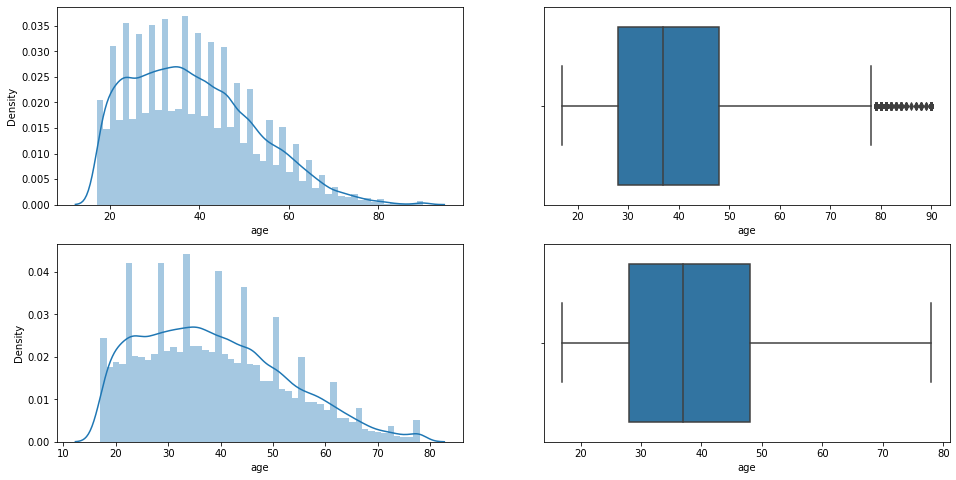

In [124]:
create_comparison_plot(df,df1,"age")

**for fnlwgt**

In [125]:
remove_outliers_IQR('fnlwgt')

percentile25 117550.5
percentile75 237642.0
Upper limit 417779.25
Lower limit -62586.75


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


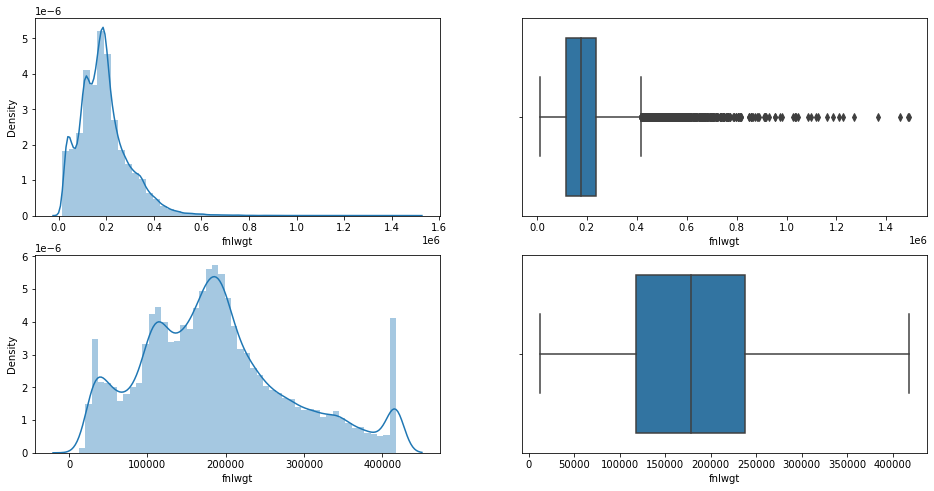

In [126]:
create_comparison_plot(df,df1,"fnlwgt")

**for education-num**

In [127]:
remove_outliers_IQR('education-num')

percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


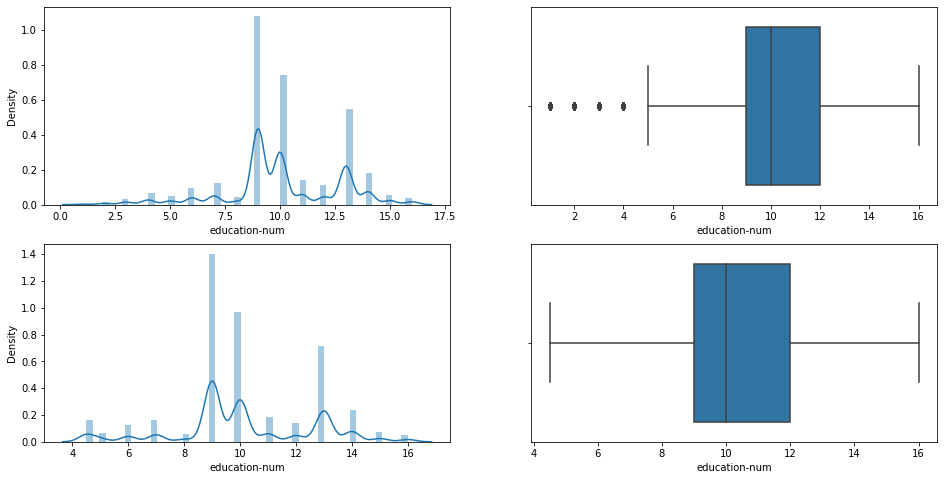

In [128]:
create_comparison_plot(df,df1,"education-num")

**for capital-gain and capital-loss** 

In [129]:
# we should not remove outliers from capital gain and capital loss as gain and losss in capital does not occur regurally in working enivonment

**for hours-per-week**

as hours-per-week is similar normal distribution so for that we use Z score for handling oultliers

In [130]:
def outlier_handler(col):
    var_mean=df1[col].mean()
    up_limit = var_mean +3*df1[col].std()
    low_limit = var_mean -3*df1[col].std()
    df1[col] = np.where(df1[col]>up_limit, up_limit, np.where(df1[col]<low_limit,low_limit,df1[col]))
    return df1[df1[col] > up_limit]

In [131]:
outlier_handler("hours-per-week")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


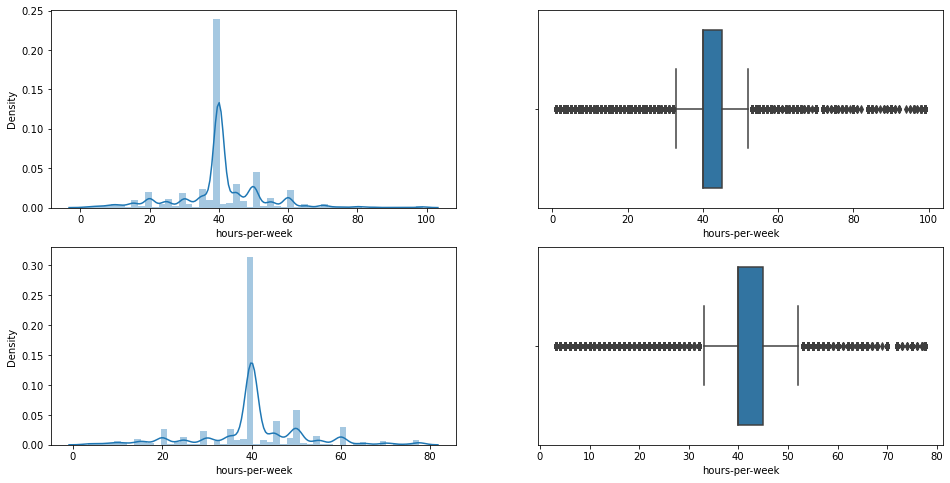

In [132]:
create_comparison_plot(df,df1,"hours-per-week")

In [133]:
# ther extreme outlers are handeled .. and these much outliers we can tolerate for time being

**checking missing values**

In [134]:
df1.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64

- first we do encoding then we handel missing values

 ## *encoding*

In [135]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [136]:
df1[categorical_features].describe()

,workclass,education,marital-status,occupation,native-country
count,46043,48842,48842,46033,47985
unique,8,16,7,14,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,United-States
freq,33906,15784,22379,6172,43832


- for race,sex and salary,relationship we will use one-hot encoding 
and for the rest of the columns we will use ordinal number encoding

- one hot encoding

In [137]:
df1=pd.get_dummies(df,columns=['race','sex','relationship','salary'],drop_first=True)

In [138]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,race_ Black,race_ Other,race_ White,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,salary_ >50K
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,2174.0,0.0,40.0,...,0,0,1,1,1,0,0,0,0,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,0.0,0.0,13.0,...,0,0,1,1,0,0,0,0,0,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,0.0,0.0,40.0,...,0,0,1,1,1,0,0,0,0,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,0.0,0.0,40.0,...,1,0,0,1,0,0,0,0,0,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,0.0,0.0,40.0,...,1,0,0,0,0,0,0,0,1,0


**ordinal number encoding** for workclass and marital-status

for workclass

In [139]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

In [140]:
df1[categorical_features].head()

,workclass,education,marital-status,occupation,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Cuba


In [142]:
df1[categorical_features].describe()

,workclass,education,marital-status,occupation,native-country
count,46043,48842,48842,46033,47985
unique,8,16,7,14,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,United-States
freq,33906,15784,22379,6172,43832


In [143]:
df1["workclass"].value_counts().index

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

In [144]:
dictionary={
    ' Private':1,' Self-emp-not-inc':2,' Local-gov':3,' State-gov':4,' Self-emp-inc':5,' Federal-gov':6,' Without-pay':7,' Never-worked':8
             }


In [145]:
(dictionary.keys())

dict_keys([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'])

In [146]:
df1["workclass"]=df1["workclass"].map(dictionary)

In [147]:
df1[categorical_features].head()

,workclass,education,marital-status,occupation,native-country
0,4.0,Bachelors,Never-married,Adm-clerical,United-States
1,2.0,Bachelors,Married-civ-spouse,Exec-managerial,United-States
2,1.0,HS-grad,Divorced,Handlers-cleaners,United-States
3,1.0,11th,Married-civ-spouse,Handlers-cleaners,United-States
4,1.0,Bachelors,Married-civ-spouse,Prof-specialty,Cuba


 for marital-status

In [148]:
len(df1["marital-status"].value_counts().index)

7

In [149]:
dictionary1={' Married-civ-spouse':1, ' Never-married':2, ' Divorced':3, ' Separated':4,
       ' Widowed':5, ' Married-spouse-absent':6, ' Married-AF-spouse':7}

In [150]:
df1["marital-status"]=df1["marital-status"].map(dictionary1)

- for education and occupation we are using lableencoder

In [151]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [152]:
df1['education']=le.fit_transform(df1["education"])

In [153]:
le.classes_

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [156]:
df1['occupation']=le.fit_transform(df1["occupation"])

In [157]:
le.classes_

array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', nan], dtype=object)

In [158]:
df1[categorical_features].head()

,workclass,education,marital-status,occupation,native-country
0,4.0,9,2,0,United-States
1,2.0,9,1,3,United-States
2,1.0,11,3,5,United-States
3,1.0,1,1,5,United-States
4,1.0,9,1,9,Cuba


for native-country we will use one hot encoding with many categories in a features

- kdd cup orange challenge with ensemble selection

taking 10 most frequent categories in each and every features and on for those 10 features we aplly one hot encoding and skipping rest of the features (drop)

**with respect to native-country**

In [160]:
df1["native-country"].value_counts().sort_values(ascending=False).head(10)

 United-States    43832
 Mexico             951
 Philippines        295
 Germany            206
 Puerto-Rico        184
 Canada             182
 El-Salvador        155
 India              151
 Cuba               138
 England            127
Name: native-country, dtype: int64

In [161]:
list_10=df1["native-country"].value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)
list_10
# we are going to apply one hot encoding for the below features and rest we are going to skip them

[' United-States',
 ' Mexico',
 ' Philippines',
 ' Germany',
 ' Puerto-Rico',
 ' Canada',
 ' El-Salvador',
 ' India',
 ' Cuba',
 ' England']

In [162]:
for categories in list_10:
    df1[categories]=np.where(df1["native-country"]==categories,1,0)

- final data after encoding

In [182]:
df1=df1.drop("native-country",axis=1)

In [184]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,United-States,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England
0,39,4.0,77516.0,9,13.0,2,0,2174.0,0.0,40.0,...,1,0,0,0,0,0,0,0,0,0
1,50,2.0,83311.0,9,13.0,1,3,0.0,0.0,13.0,...,1,0,0,0,0,0,0,0,0,0
2,38,1.0,215646.0,11,9.0,3,5,0.0,0.0,40.0,...,1,0,0,0,0,0,0,0,0,0
3,53,1.0,234721.0,1,7.0,1,5,0.0,0.0,40.0,...,1,0,0,0,0,0,0,0,0,0
4,28,1.0,338409.0,9,13.0,1,9,0.0,0.0,40.0,...,0,0,0,0,0,0,0,0,1,0


### data segregation

In [185]:
# segregating the data base on salary

In [186]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(df1,df1["salary_ >50K"]):
    strat_train_set=df1.loc[train_index]
    strat_test_set=df1.loc[test_index]

In [187]:
strat_train_set["salary_ >50K"].value_counts()

0    26008
1     8181
Name: salary_ >50K, dtype: int64

In [188]:
strat_test_set["salary_ >50K"].value_counts()

0    11147
1     3506
Name: salary_ >50K, dtype: int64

In [189]:
# data is imbalance but we can work with this for the time being

**spliting the data**

In [190]:
x_train=strat_train_set.drop("salary_ >50K",axis=1)
y_train=strat_train_set["salary_ >50K"]
x_test=strat_test_set.drop("salary_ >50K",axis=1)
y_test=strat_test_set["salary_ >50K"]

**handling null values**

- using knn imputer for imputing the null values

In [191]:
from sklearn.impute import KNNImputer

In [203]:
knn = KNNImputer() # with default parameter
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)

In [223]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'capital-gain', 'capital-loss',
       'hours-per-week', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', ' United-States', ' Mexico', ' Philippines',
       ' Germany', ' Puerto-Rico', ' Canada', ' El-Salvador', ' India',
       ' Cuba', ' England'],
      dtype='object')

In [210]:
new_x_train=pd.DataFrame(x_train_trf,columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'capital-gain', 'capital-loss',
       'hours-per-week', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', ' United-States', ' Mexico', ' Philippines',
       ' Germany', ' Puerto-Rico', ' Canada', ' El-Salvador', ' India',
       ' Cuba', ' England'])

In [211]:
new_x_test=pd.DataFrame(x_test_trf,columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'capital-gain', 'capital-loss',
       'hours-per-week', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', ' United-States', ' Mexico', ' Philippines',
       ' Germany', ' Puerto-Rico', ' Canada', ' El-Salvador', ' India',
       ' Cuba', ' England'])

In [212]:
# now we are good to go

**Feature selection**

In [219]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(new_x_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [227]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [228]:
#no feature is constant

**pearson correlation**

In [229]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [230]:
# giving threshold 60 percent for the time 
threshold=0.95

In [231]:
correlation(new_x_train.iloc[:,:-1],threshold)

set()

In [232]:
# nothing to  drop

In [233]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(new_x_train,y_train)

ExtraTreesClassifier()

In [234]:
print(model.feature_importances_)

[0.15700671 0.04218664 0.16686053 0.0351356  0.09180609 0.04703452
 0.0756302  0.08626376 0.02645814 0.09514367 0.00255838 0.00369212
 0.00102295 0.00475088 0.02676011 0.04200426 0.00758521 0.03989705
 0.01598524 0.01520556 0.00694045 0.00258969 0.00109772 0.00107088
 0.00066091 0.00144638 0.00037539 0.0008716  0.00097888 0.00098047]


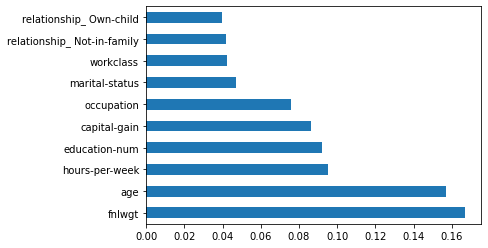

In [235]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

Target vs independent feature

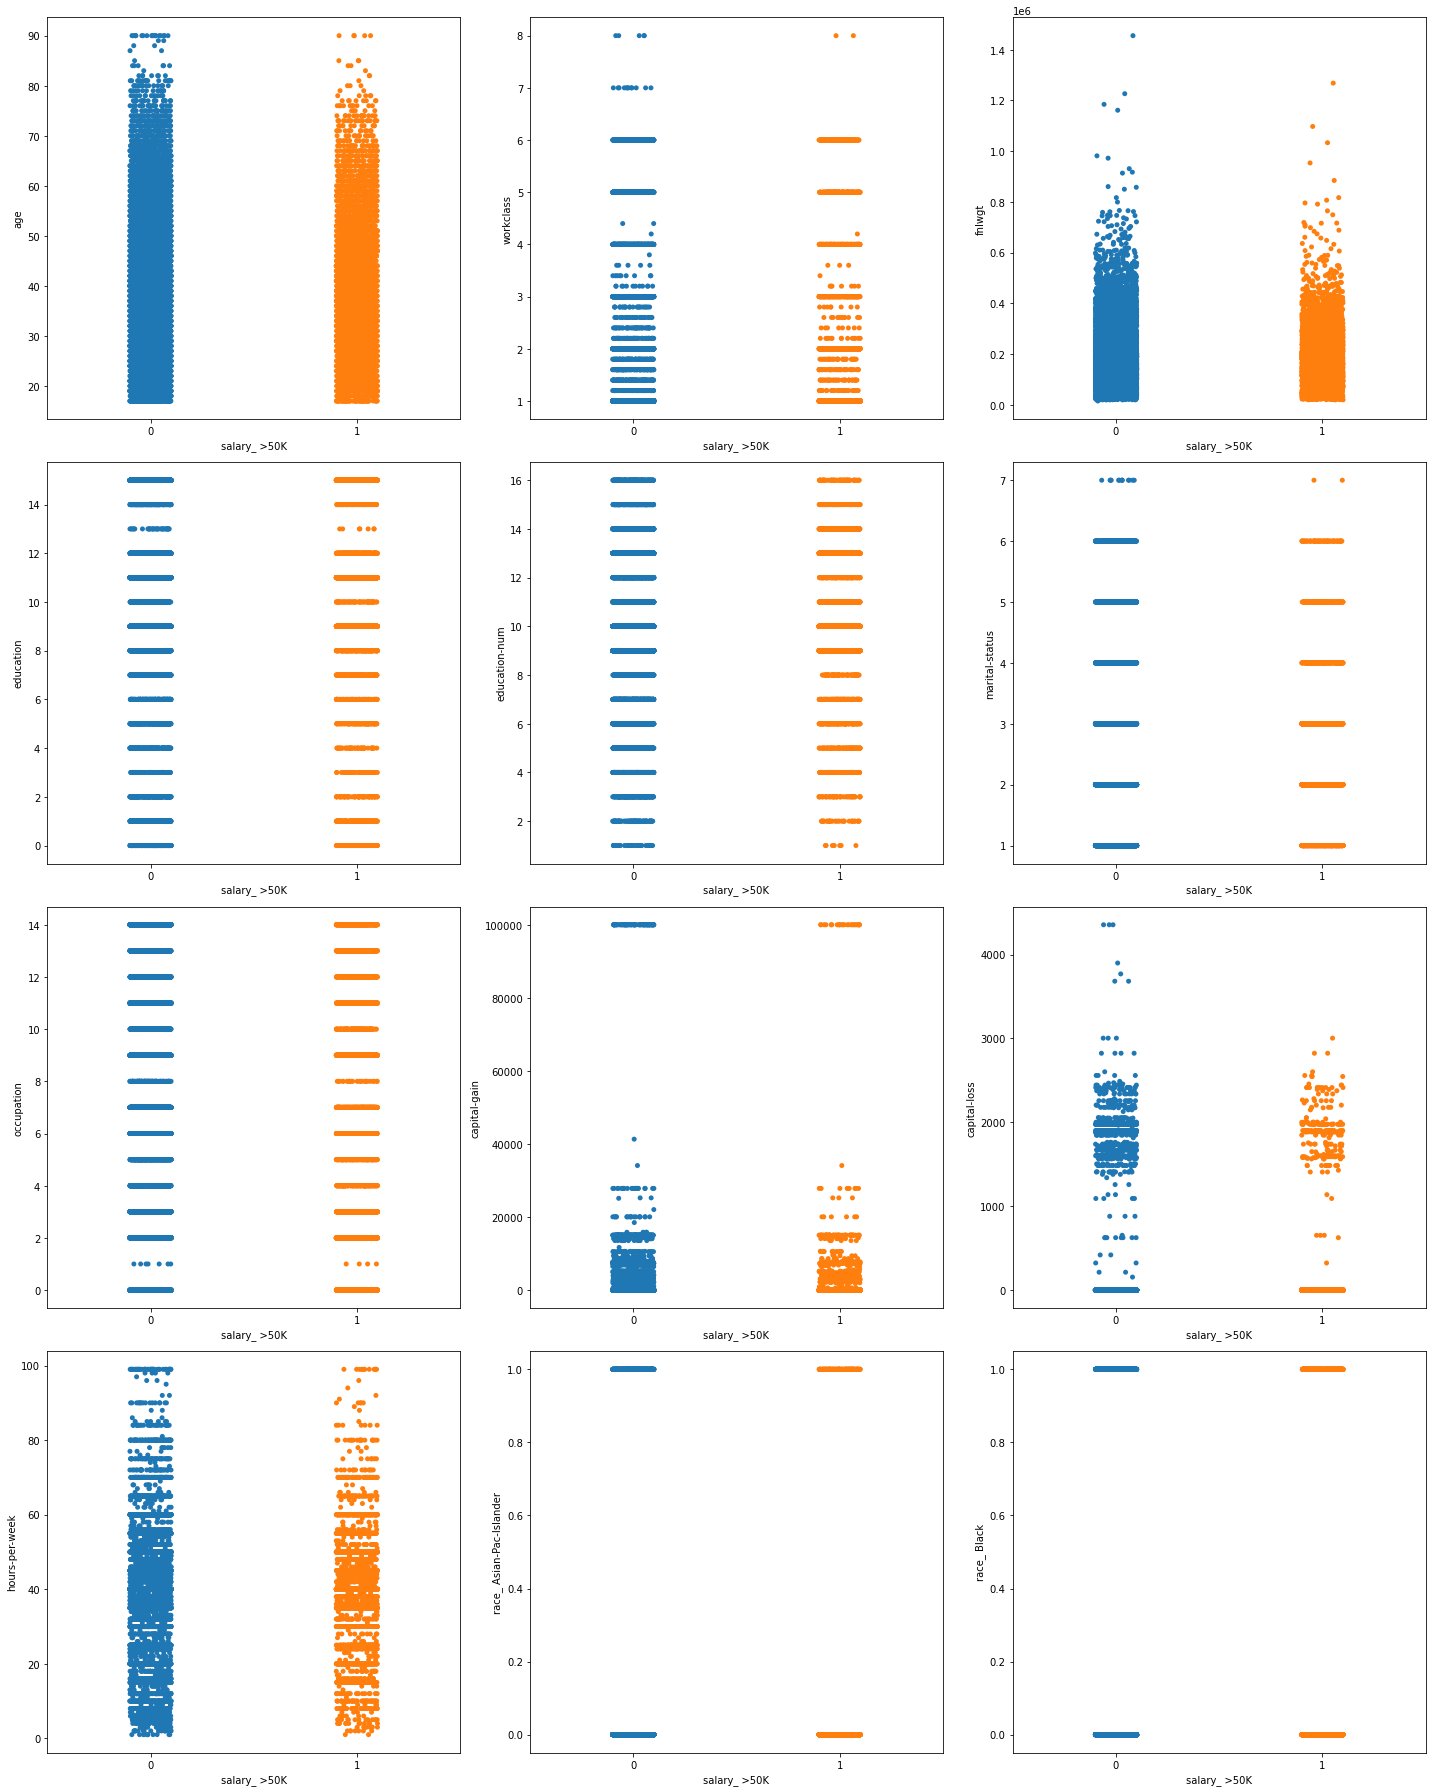

In [238]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_train.columns:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y_train,new_x_train[column])
    plotnumber+=1
plt.tight_layout()

# importing data to mogodb  this step is not requred

In [250]:
new_x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,United-States,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England
0,41.0,3.0,98823.0,9.0,13.0,1.0,9.0,0.0,0.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.0,1.0,132601.0,11.0,9.0,2.0,7.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,1.0,210008.0,11.0,9.0,2.0,11.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.0,1.0,115488.0,11.0,9.0,1.0,4.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58.0,1.0,119751.0,11.0,9.0,1.0,8.0,0.0,0.0,60.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
pd.DataFrame(y_train).head(10)

,salary_ >50K
38990,0
17290,0
9395,0
15568,0
23607,0
47863,1
797,0
35074,0
12702,0
7864,0


In [316]:
pd.DataFrame(y_train.values,columns=["salary_ >50K"]).head(10) # for changing the index according to train data

,salary_ >50K
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [320]:
training_data=pd.concat([new_x_train,pd.DataFrame(y_train.values,columns=["salary_ >50K"])],axis=1)

In [321]:
training_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,41.0,3.0,98823.0,9.0,13.0,1.0,9.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,31.0,1.0,132601.0,11.0,9.0,2.0,7.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,31.0,1.0,210008.0,11.0,9.0,2.0,11.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,31.0,1.0,115488.0,11.0,9.0,1.0,4.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,58.0,1.0,119751.0,11.0,9.0,1.0,8.0,0.0,0.0,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,47.0,6.0,239321.0,8.0,11.0,1.0,0.0,0.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,25.0,1.0,316688.0,11.0,9.0,2.0,6.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,34.0,1.0,100145.0,15.0,10.0,1.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,23.0,1.0,695136.0,11.0,9.0,2.0,5.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,36.0,1.0,160035.0,11.0,9.0,1.0,2.0,3908.0,0.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [263]:
new_x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,United-States,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England
0,42.0,1.0,54102.0,15.0,10.0,3.0,0.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,6.0,186791.0,11.0,9.0,3.0,0.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.0,1.0,361487.0,11.0,9.0,2.0,2.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,3.0,164515.0,11.0,9.0,3.0,0.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34.0,3.0,167063.0,11.0,9.0,2.0,10.0,0.0,0.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
pd.DataFrame(y_test.values,columns=["salary_ >50K"]).head(10)

,salary_ >50K
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [322]:
testing_data=pd.concat([new_x_test,pd.DataFrame(y_test.values,columns=["salary_ >50K"])],axis=1)

In [323]:
testing_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,42.0,1.0,54102.0,15.0,10.0,3.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55.0,6.0,186791.0,11.0,9.0,3.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,22.0,1.0,361487.0,11.0,9.0,2.0,2.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,39.0,3.0,164515.0,11.0,9.0,3.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,34.0,3.0,167063.0,11.0,9.0,2.0,10.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,38.0,4.0,142282.0,9.0,13.0,2.0,9.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,62.0,1.0,232308.0,9.0,13.0,1.0,3.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,43.0,4.0,117471.0,11.0,9.0,2.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,58.0,6.0,75867.0,11.0,9.0,1.0,12.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,41.0,1.0,373469.0,7.0,12.0,1.0,6.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [324]:
# we are going to create 2 tables for these dataframe 

In [359]:
import pymongo
client = pymongo.MongoClient("mongodb+srv://Prikshit7766:<password>@cluster0.bb7u7jb.mongodb.net/?retryWrites=true&w=majority")
db = client.test
database=client["AdultCensus"]

In [360]:
#converting datafrae to dict
data_training=training_data.to_dict('records')

In [361]:
data_testing=testing_data.to_dict('records')

In [362]:
collection_training= database["data_training"]
collection_testing= database["data_testing"]


In [363]:
collection_training.insert_many(data_training)
collection_testing.insert_many(data_testing)

# or 

In [ ]:
try:
    import pymongo
    from pymongo import MongoClient
    import pandas as pd
    import json
except Exception as e:
    print("Some Modules are Missing ")


class MongoDB(object):

    def __init__(self, dBName=None, collectionName=None):

        self.dBName = dBName
        self.collectionName = collectionName

        self.client = MongoClient("mongodb+srv://Prikshit7766:<password>@cluster0.bb7u7jb.mongodb.net/?retryWrites=true&w=majority")

        self.DB = self.client[self.dBName]
        self.collection = self.DB[self.collectionName]



    def InsertData(self, df):
        """
        :param path: Path os csv File
        :return: None
        """

        
        data = df.to_dict('records')

        self.collection.insert_many(data, ordered=False)
        print("All the Data has been Exported to Mongo DB Server .... ")




In [ ]:

mongodb = MongoDB(dBName = 'AdultCensus', collectionName='Dataset')
mongodb.InsertData(training_data)

Importing data from MongoDB into Python (Pandas)

In [385]:

#select database
db = client["AdultCensus"]
#select the collection within the database
train = db.data_training
#convert entire collection to Pandas dataframe
train = pd.DataFrame(list(train.find()))

In [386]:
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,41.0,3.0,98823.0,9.0,13.0,1.0,9.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,31.0,1.0,132601.0,11.0,9.0,2.0,7.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,31.0,1.0,210008.0,11.0,9.0,2.0,11.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,31.0,1.0,115488.0,11.0,9.0,1.0,4.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,58.0,1.0,119751.0,11.0,9.0,1.0,8.0,0.0,0.0,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [387]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           34189 non-null  float64
 1   workclass                     34189 non-null  float64
 2   fnlwgt                        34189 non-null  float64
 3   education                     34189 non-null  float64
 4   education-num                 34189 non-null  float64
 5   marital-status                34189 non-null  float64
 6   occupation                    34189 non-null  float64
 7   capital-gain                  34189 non-null  float64
 8   capital-loss                  34189 non-null  float64
 9   hours-per-week                34189 non-null  float64
 10  race_ Asian-Pac-Islander      34189 non-null  float64
 11  race_ Black                   34189 non-null  float64
 12  race_ Other                   34189 non-null  float64
 13  r

In [388]:
train.head()

,_id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,636aa5cfc9973cfedbc02c61,41.0,3.0,98823.0,9.0,13.0,1.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,636aa5cfc9973cfedbc02c62,31.0,1.0,132601.0,11.0,9.0,2.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,636aa5cfc9973cfedbc02c63,31.0,1.0,210008.0,11.0,9.0,2.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,636aa5cfc9973cfedbc02c64,31.0,1.0,115488.0,11.0,9.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,636aa5cfc9973cfedbc02c65,58.0,1.0,119751.0,11.0,9.0,1.0,8.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [389]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           34189 non-null  object 
 1   age                           34189 non-null  float64
 2   workclass                     34189 non-null  float64
 3   fnlwgt                        34189 non-null  float64
 4   education                     34189 non-null  float64
 5   education-num                 34189 non-null  float64
 6   marital-status                34189 non-null  float64
 7   occupation                    34189 non-null  float64
 8   capital-gain                  34189 non-null  float64
 9   capital-loss                  34189 non-null  float64
 10  hours-per-week                34189 non-null  float64
 11  race_ Asian-Pac-Islander      34189 non-null  float64
 12  race_ Black                   34189 non-null  float64
 13  r

compare both the data

simillary for testing data

In [390]:
#select database
db = client["AdultCensus"]
#select the collection within the database
test = db.data_testing
#convert entire collection to Pandas dataframe
test= pd.DataFrame(list(test.find()))

In [391]:
testing_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,42.0,1.0,54102.0,15.0,10.0,3.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55.0,6.0,186791.0,11.0,9.0,3.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,22.0,1.0,361487.0,11.0,9.0,2.0,2.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,39.0,3.0,164515.0,11.0,9.0,3.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,34.0,3.0,167063.0,11.0,9.0,2.0,10.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,38.0,4.0,142282.0,9.0,13.0,2.0,9.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,62.0,1.0,232308.0,9.0,13.0,1.0,3.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,43.0,4.0,117471.0,11.0,9.0,2.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,58.0,6.0,75867.0,11.0,9.0,1.0,12.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,41.0,1.0,373469.0,7.0,12.0,1.0,6.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [392]:
test.head(10)

,_id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,capital-gain,capital-loss,...,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,salary_ >50K
0,636aa605c9973cfedbc0b1ee,42.0,1.0,54102.0,15.0,10.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,636aa605c9973cfedbc0b1ef,55.0,6.0,186791.0,11.0,9.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,636aa605c9973cfedbc0b1f0,22.0,1.0,361487.0,11.0,9.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,636aa605c9973cfedbc0b1f1,39.0,3.0,164515.0,11.0,9.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,636aa605c9973cfedbc0b1f2,34.0,3.0,167063.0,11.0,9.0,2.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,636aa605c9973cfedbc0b1f3,38.0,4.0,142282.0,9.0,13.0,2.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,636aa605c9973cfedbc0b1f4,62.0,1.0,232308.0,9.0,13.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,636aa605c9973cfedbc0b1f5,43.0,4.0,117471.0,11.0,9.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,636aa605c9973cfedbc0b1f6,58.0,6.0,75867.0,11.0,9.0,1.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,636aa605c9973cfedbc0b1f7,41.0,1.0,373469.0,7.0,12.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [393]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14653 entries, 0 to 14652
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           14653 non-null  float64
 1   workclass                     14653 non-null  float64
 2   fnlwgt                        14653 non-null  float64
 3   education                     14653 non-null  float64
 4   education-num                 14653 non-null  float64
 5   marital-status                14653 non-null  float64
 6   occupation                    14653 non-null  float64
 7   capital-gain                  14653 non-null  float64
 8   capital-loss                  14653 non-null  float64
 9   hours-per-week                14653 non-null  float64
 10  race_ Asian-Pac-Islander      14653 non-null  float64
 11  race_ Black                   14653 non-null  float64
 12  race_ Other                   14653 non-null  float64
 13  r

In [394]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14653 entries, 0 to 14652
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           14653 non-null  object 
 1   age                           14653 non-null  float64
 2   workclass                     14653 non-null  float64
 3   fnlwgt                        14653 non-null  float64
 4   education                     14653 non-null  float64
 5   education-num                 14653 non-null  float64
 6   marital-status                14653 non-null  float64
 7   occupation                    14653 non-null  float64
 8   capital-gain                  14653 non-null  float64
 9   capital-loss                  14653 non-null  float64
 10  hours-per-week                14653 non-null  float64
 11  race_ Asian-Pac-Islander      14653 non-null  float64
 12  race_ Black                   14653 non-null  float64
 13  r